In [7]:
import csv

csvFile = open("./report.out", "r")
reader = csv.reader(csvFile)

codec_list = []
json_list = []
title_list = []
for item in reader:
    if item[0] == 'Codec':
        codec_list.append(int(item[2]))
    if item[0] == 'Json':
        json_list.append(int(item[2]))
    it = item[1]
    if it not in title_list:
        title_list.append(it)
csvFile.close()

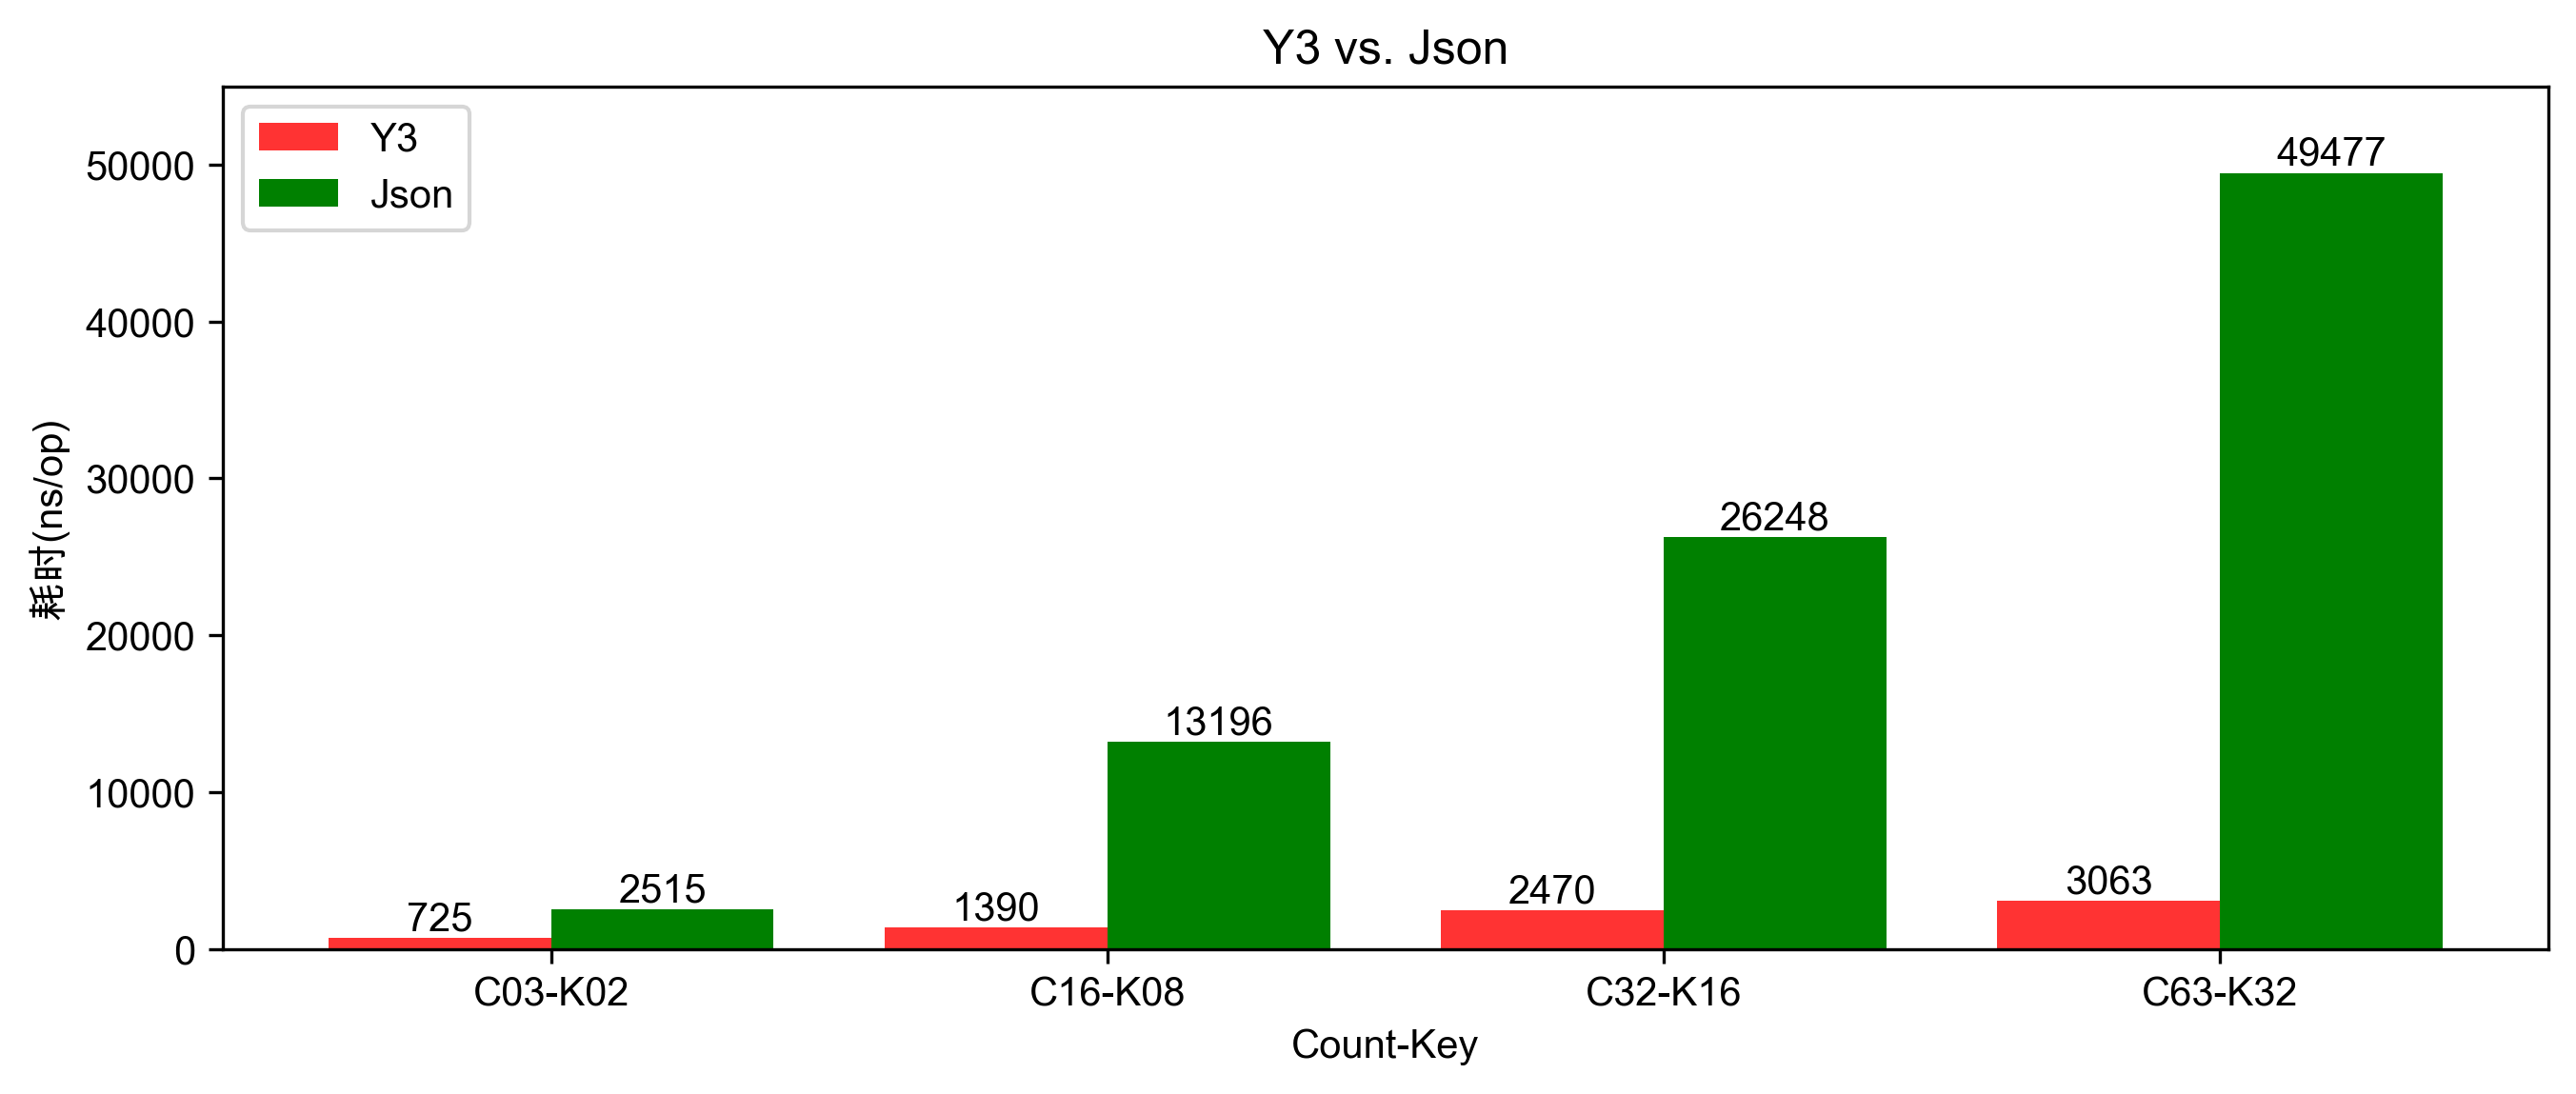

In [9]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False


from IPython.core.pylabtools import figsize
figsize(10.5, 4)

plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300

label_list = title_list
num_list1 = codec_list 
num_list2 = json_list
x = range(len(num_list1))

rects1 = plt.bar(x, height=num_list1, width=0.4, alpha=0.8, color='red', label="Y3")
rects2 = plt.bar([i + 0.4 for i in x], height=num_list2, width=0.4, color='green', label="Json")
plt.ylim(0, 55000)
plt.ylabel("耗时(ns/op)")

plt.xticks([index + 0.2 for index in x], label_list)
plt.xlabel("Count-Key")
plt.title("Y3 vs. Json")
plt.legend()

for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
plt.savefig('./report.jpg')
plt.show()